In [1]:
# =============================================================================
# # 1. SETUP: IMPORTING LIBRARIES
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Set a visual style for the plots
sns.set_style("whitegrid")

--- First 5 Rows of the Dataset ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    flo

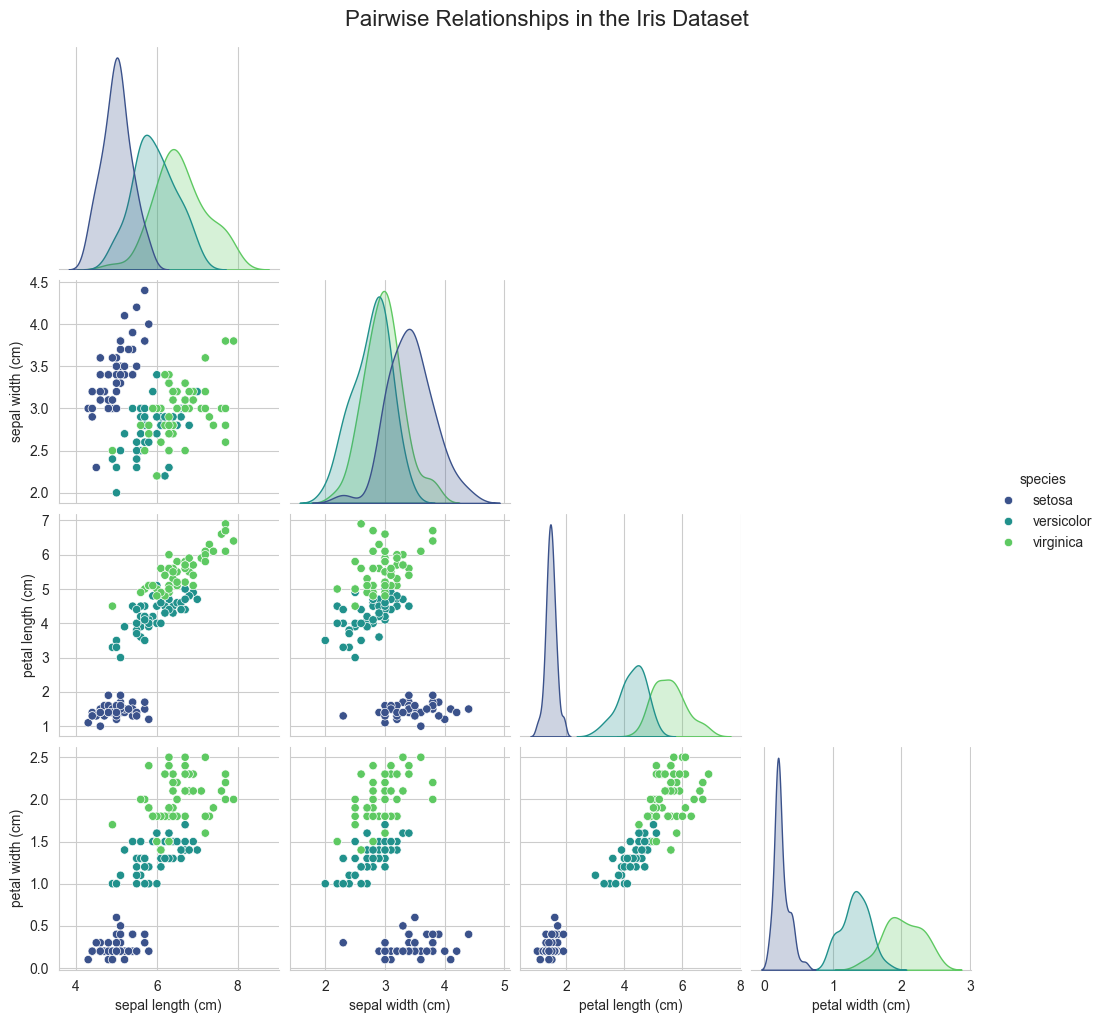

In [2]:
# =============================================================================
# # 2. DATA LOADING AND EXPLORATION
# =============================================================================
# Load the built-in Iris dataset from Scikit-learn
iris = load_iris()

# Create a pandas DataFrame for easier manipulation and exploration
# The data is in iris.data, and the target (species) is in iris.target
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# For better readability, let's map the target numbers to actual species names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("--- First 5 Rows of the Dataset ---")
print(df.head())
print("\n" + "="*50 + "\n")

print("--- Dataset Information ---")
df.info()
print("\n" + "="*50 + "\n")

# --- EXPLORATORY DATA ANALYSIS (EDA) ---
# A pairplot is fantastic for visualizing relationships between all features
# and how they differ by species.
print("--- Visualizing Feature Relationships ---")
sns.pairplot(df, hue='species', palette='viridis', corner=True)
plt.suptitle('Pairwise Relationships in the Iris Dataset', y=1.02, fontsize=16)
plt.savefig('iris_pairplot.png')
plt.show()
# Insight: The pairplot shows that the 'setosa' species is linearly separable
# from the other two, which should make it easy for our model to classify.


In [3]:
# =============================================================================
# # 3. DATA PREPARATION
# =============================================================================
# Define our features (X) and target (y)
# X contains the measurements, y contains the species
X = df.drop('species', axis=1)
y = df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# 'stratify=y' ensures the proportion of each species is the same in both train and test sets.

print("--- Data Splitting ---")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

--- Data Splitting ---
Training set size: 105 samples
Testing set size: 45 samples


In [4]:
# =============================================================================
# # 4. TRAINING THE LOGISTIC REGRESSION MODEL
# =============================================================================
# Create and train the model
# We set max_iter to 200 to ensure the model converges.
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

print("--- Model Training Complete ---")

--- Model Training Complete ---


--- Model Evaluation ---
Accuracy Score: 0.93
Interpretation: The model correctly classified 93% of the flowers in the test set.
--- Confusion Matrix ---


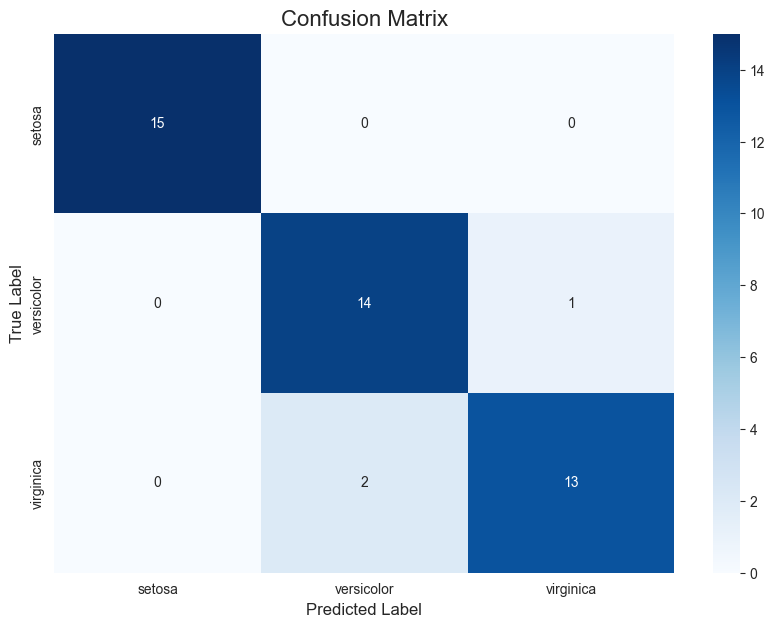

In [5]:
# =============================================================================
# # 5. MAKING PREDICTIONS & EVALUATING THE MODEL
# =============================================================================
# Make predictions on the test set
y_pred = model.predict(X_test)

# --- Evaluate the model's performance ---
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("--- Model Evaluation ---")
print(f"Accuracy Score: {accuracy:.2f}")
print(f"Interpretation: The model correctly classified {accuracy*100:.0f}% of the flowers in the test set.")


# Confusion Matrix
# This is a powerful tool to see where the model is getting confused.
print("--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred, labels=iris.target_names)

# For a better visual, we'll plot it as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.savefig('confusion_matrix.png') # Save this plot for your LinkedIn post
plt.show()